In [41]:
import pandas as pd
import numpy as np

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
URL_DATA = '/content/drive/MyDrive/AI-Discovery-of-Unknown-Multi-Disease-Phenotypes-in-Longitudinal-Electronic-Health-Records/physionet.org/files/mimic-iv-demo/2.2/'
URL_PROJECT = '/content/drive/MyDrive/AI-Discovery-of-Unknown-Multi-Disease-Phenotypes-in-Longitudinal-Electronic-Health-Records/'

In [44]:
!pip install scispacy
!pip install icd-mappings

In [45]:
df_procedures_icd = pd.read_csv(URL_DATA+'hosp/procedures_icd.csv.gz')
df_procedures_icd[df_procedures_icd['icd_version']!=9]

,subject_id,hadm_id,seq_num,chartdate,icd_code,icd_version
13,10007818,22987108,15,2146-06-20,02H633Z,10
14,10007818,22987108,13,2146-06-22,0BH17EZ,10
15,10007818,22987108,17,2146-06-21,B211YZZ,10
16,10007818,22987108,11,2146-06-11,3E0G76Z,10
17,10007818,22987108,6,2146-06-29,0BCH8ZZ,10
...,...,...,...,...,...,...
695,10002428,28295257,1,2160-04-18,0DJD8ZZ,10
718,10021118,24490144,4,2161-11-19,5A1221Z,10
719,10021118,24490144,3,2161-11-19,06BP4ZZ,10
720,10021118,24490144,1,2161-11-19,02100Z9,10


In [46]:
from icdmappings import Mapper

mapper = Mapper()

icd9code = '3961'
mapper.map(icd9code, source='icd9', target='ccs')

'96'

In [47]:
df_diagnoses_icd = pd.read_csv(URL_DATA+'hosp/diagnoses_icd.csv.gz')
df_labevents = pd.read_csv(URL_DATA+'hosp/labevents.csv.gz')
df_chartevents = pd.read_csv(URL_DATA+'icu/chartevents.csv.gz')
df_admissions = pd.read_csv(URL_DATA+'hosp/admissions.csv.gz')
df_patients = pd.read_csv(URL_DATA+'hosp/patients.csv.gz')

In [101]:
df_d_labitems

,itemid,label,fluid,category
0,50808,Free Calcium,Blood,Blood Gas
1,50826,Tidal Volume,Blood,Blood Gas
2,50813,Lactate,Blood,Blood Gas
3,52029,% Ionized Calcium,Blood,Blood Gas
4,50801,Alveolar-arterial Gradient,Blood,Blood Gas
...,...,...,...,...
1617,52249,Delete,Cerebrospinal Fluid,Hematology
1618,52251,Delete,Cerebrospinal Fluid,Hematology
1619,52266,Macrophage,Cerebrospinal Fluid,Hematology
1620,52262,Immunophenotyping,Cerebrospinal Fluid,Hematology


In [57]:
df_labevents.isna().sum()

,0
labevent_id,0
subject_id,0
hadm_id,28420
specimen_id,0
itemid,0
order_provider_id,90897
charttime,0
storetime,992
value,9588
valuenum,12481


# `d_labitems.csv.gz`:

This csv maps `item_id` numbers to label, fluid, caegory scheme for the labevents.

In [58]:
# 1. Keep only numeric lab results with valid values
df_labs = df_labevents[df_labevents['valuenum'].notnull()].copy()
df_labs


,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
0,172061,10014354,29600294.0,1808066,51277,NaN,2148-08-16 00:00:00,2148-08-16 01:30:00,15.4,15.40,%,10.5,15.5,NaN,ROUTINE,NaN
1,172062,10014354,29600294.0,1808066,51279,NaN,2148-08-16 00:00:00,2148-08-16 01:30:00,3.35,3.35,m/uL,4.6,6.1,abnormal,ROUTINE,NaN
2,172068,10014354,29600294.0,1808066,52172,NaN,2148-08-16 00:00:00,2148-08-16 01:30:00,49.7,49.70,fL,35.1,46.3,abnormal,ROUTINE,NaN
3,172063,10014354,29600294.0,1808066,51301,NaN,2148-08-16 00:00:00,2148-08-16 01:30:00,20.3,20.30,K/uL,4.0,10.0,abnormal,ROUTINE,NaN
4,172050,10014354,29600294.0,1808066,51249,NaN,2148-08-16 00:00:00,2148-08-16 01:30:00,31.1,31.10,g/dL,32.0,37.0,abnormal,ROUTINE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107720,254704,10021487,28998349.0,78791160,50821,NaN,2116-12-07 18:59:00,2116-12-07 19:00:00,145,145.00,mm Hg,85.0,105.0,abnormal,NaN,NaN
107721,254699,10021487,28998349.0,78791160,50802,NaN,2116-12-07 18:59:00,2116-12-07 19:00:00,7,7.00,mEq/L,NaN,NaN,NaN,NaN,NaN
107722,254700,10021487,28998349.0,78791160,50804,NaN,2116-12-07 18:59:00,2116-12-07 19:00:00,35,35.00,mEq/L,21.0,30.0,abnormal,NaN,NaN
107723,254702,10021487,28998349.0,78791160,50818,NaN,2116-12-07 18:59:00,2116-12-07 19:00:00,56,56.00,mm Hg,35.0,45.0,abnormal,NaN,NaN


In [200]:
# Load lab dictionary
df_dict = pd.read_csv(URL_DATA+"hosp/d_labitems.csv.gz")
df_labs = pd.read_csv(URL_DATA+"hosp/labevents.csv.gz")

# Find all unique itemids in labs
itemids_in_labs = set(df_labs['itemid'].unique())
itemids_in_dict = set(df_dict['itemid'].unique())

# Itemids that are in labevents but not in dictionary
unmapped_itemids = itemids_in_labs - itemids_in_dict

print(f"Total itemids in labevents: {len(itemids_in_labs)}")
print(f"Unmapped itemids: {len(unmapped_itemids)} → {sorted(unmapped_itemids)}")

Total itemids in labevents: 498
Unmapped itemids: 0 → []


In [201]:
import pandas as pd

# Assume df_labevents is your lab events DataFrame with columns:
# ['subject_id', 'hadm_id', 'itemid', 'valuenum', 'valueuom', 'charttime']

# 1. Keep only numeric lab results with valid values
df_labs = df_labevents[df_labevents['valuenum'].notnull()].copy()

# 2. Group by admission and itemid, aggregate summary stats
agg_funcs = ['mean', 'std']

# This will produce a MultiIndex columns DataFrame
summary = df_labs.groupby(['hadm_id', 'itemid'])['valuenum'].agg(agg_funcs)

# 3. Flatten MultiIndex columns
summary.columns = ['_'.join(col).strip() for col in summary.columns.values]

# 4. Reset index to turn hadm_id and itemid into columns
summary = summary.reset_index()

# 5. Pivot so each itemid's stats become separate columns
feature_table = summary.pivot(index='hadm_id', columns='itemid')

# 6. Flatten columns after pivot
feature_table.columns = [f'{stat}_item_{itemid}' for stat, itemid in feature_table.columns]

# 7. Reset index to get hadm_id as a column
feature_table = feature_table.reset_index()

print(feature_table.head())


      hadm_id  m_e_a_n_item_50801  m_e_a_n_item_50802  m_e_a_n_item_50803  \
0  20044587.0                 NaN            0.181818                 NaN   
1  20093566.0                 NaN           -1.500000                 NaN   
2  20192635.0                 NaN                 NaN                 NaN   
3  20199380.0                 NaN                 NaN                 NaN   
4  20214994.0                 NaN          -10.375000                 NaN   

   m_e_a_n_item_50804  m_e_a_n_item_50805  m_e_a_n_item_50806  \
0           25.181818                 NaN               116.0   
1           25.000000                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4           15.937500                 NaN               113.0   

   m_e_a_n_item_50808  m_e_a_n_item_50809  m_e_a_n_item_50810  ...  \
0            1.174444          120.142857                30.0  ...   
1     

In [202]:
# Drop columns missing in more than 80% of patients
threshold = 0.8
non_sparse = feature_table.columns[feature_table.isnull().mean() < threshold]
feature_table = feature_table[non_sparse]

In [203]:
feature_table

,hadm_id,m_e_a_n_item_50802,m_e_a_n_item_50804,m_e_a_n_item_50808,m_e_a_n_item_50809,m_e_a_n_item_50813,m_e_a_n_item_50817,m_e_a_n_item_50818,m_e_a_n_item_50820,m_e_a_n_item_50821,...,s_t_d_item_51254,s_t_d_item_51256,s_t_d_item_51265,s_t_d_item_51274,s_t_d_item_51275,s_t_d_item_51277,s_t_d_item_51279,s_t_d_item_51301,s_t_d_item_51678,s_t_d_item_52172
0,20044587.0,0.181818,25.181818,1.174444,120.142857,1.950000,96.5,38.181818,7.415385,222.272727,...,NaN,NaN,40.584144,1.275931,0.882610,0.358569,0.231254,2.058389,NaN,NaN
1,20093566.0,-1.500000,25.000000,NaN,NaN,1.950000,NaN,42.500000,7.350000,152.000000,...,NaN,NaN,5.291503,0.287228,1.436141,0.353553,0.158623,1.041367,1.214986,1.421267
2,20192635.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,28.284271,NaN,NaN,0.070711,0.155563,2.192031,NaN,NaN
3,20199380.0,NaN,NaN,1.040000,137.000000,0.900000,NaN,NaN,7.370000,NaN,...,NaN,NaN,32.491482,0.311448,32.017333,0.140789,0.396485,1.753975,5.000000,0.882266
4,20214994.0,-10.375000,15.937500,1.130000,132.666667,6.920000,80.0,33.437500,7.260625,141.625000,...,3.181981,13.930004,34.491929,3.958114,8.096451,0.936916,0.486037,2.214168,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,29820177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.658328,NaN,NaN,0.251661,0.162583,0.264575,NaN,NaN
248,29839885.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,29842315.0,NaN,NaN,NaN,NaN,2.150000,55.0,NaN,NaN,NaN,...,NaN,NaN,19.014562,1.830642,20.519476,0.192725,0.413660,1.913673,2.725541,0.796421
250,29858644.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13.500000,0.424264,1.060660,0.057735,0.200832,0.607591,NaN,NaN


In [204]:
# Fix column names
feature_table.columns = [
    col.replace('m_e_a_n', 'mean')
       .replace('s_t_d', 'std')
    if isinstance(col, str) else col
    for col in feature_table.columns
]

In [205]:
feature_table

,hadm_id,mean_item_50802,mean_item_50804,mean_item_50808,mean_item_50809,mean_item_50813,mean_item_50817,mean_item_50818,mean_item_50820,mean_item_50821,...,std_item_51254,std_item_51256,std_item_51265,std_item_51274,std_item_51275,std_item_51277,std_item_51279,std_item_51301,std_item_51678,std_item_52172
0,20044587.0,0.181818,25.181818,1.174444,120.142857,1.950000,96.5,38.181818,7.415385,222.272727,...,NaN,NaN,40.584144,1.275931,0.882610,0.358569,0.231254,2.058389,NaN,NaN
1,20093566.0,-1.500000,25.000000,NaN,NaN,1.950000,NaN,42.500000,7.350000,152.000000,...,NaN,NaN,5.291503,0.287228,1.436141,0.353553,0.158623,1.041367,1.214986,1.421267
2,20192635.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,28.284271,NaN,NaN,0.070711,0.155563,2.192031,NaN,NaN
3,20199380.0,NaN,NaN,1.040000,137.000000,0.900000,NaN,NaN,7.370000,NaN,...,NaN,NaN,32.491482,0.311448,32.017333,0.140789,0.396485,1.753975,5.000000,0.882266
4,20214994.0,-10.375000,15.937500,1.130000,132.666667,6.920000,80.0,33.437500,7.260625,141.625000,...,3.181981,13.930004,34.491929,3.958114,8.096451,0.936916,0.486037,2.214168,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,29820177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.658328,NaN,NaN,0.251661,0.162583,0.264575,NaN,NaN
248,29839885.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,29842315.0,NaN,NaN,NaN,NaN,2.150000,55.0,NaN,NaN,NaN,...,NaN,NaN,19.014562,1.830642,20.519476,0.192725,0.413660,1.913673,2.725541,0.796421
250,29858644.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13.500000,0.424264,1.060660,0.057735,0.200832,0.607591,NaN,NaN


In [206]:

new_columns = []


for col in feature_table.columns:
    if '_item_' in col:
        stat, _, itemid = col.partition('_item_')
        try:
            itemid_int = int(itemid)
            label = df_dict[df_dict['itemid'] == itemid_int]['label'].values[0]
            # Format label to avoid spaces
            new_col = f"{stat}_item_{itemid}_{label.replace(' ', '_')}"
        except (IndexError, ValueError):
            # If itemid is not found in the dict
            new_col = col
    else:
        new_col = col
    new_columns.append(new_col)

feature_table.columns = new_columns

In [207]:
feature_table

,hadm_id,mean_item_50802_Base_Excess,mean_item_50804_Calculated_Total_CO2,mean_item_50808_Free_Calcium,mean_item_50809_Glucose,mean_item_50813_Lactate,mean_item_50817_Oxygen_Saturation,mean_item_50818_pCO2,mean_item_50820_pH,mean_item_50821_pO2,...,std_item_51254_Monocytes,std_item_51256_Neutrophils,std_item_51265_Platelet_Count,std_item_51274_PT,std_item_51275_PTT,std_item_51277_RDW,std_item_51279_Red_Blood_Cells,std_item_51301_White_Blood_Cells,std_item_51678_L,std_item_52172_RDW-SD
0,20044587.0,0.181818,25.181818,1.174444,120.142857,1.950000,96.5,38.181818,7.415385,222.272727,...,NaN,NaN,40.584144,1.275931,0.882610,0.358569,0.231254,2.058389,NaN,NaN
1,20093566.0,-1.500000,25.000000,NaN,NaN,1.950000,NaN,42.500000,7.350000,152.000000,...,NaN,NaN,5.291503,0.287228,1.436141,0.353553,0.158623,1.041367,1.214986,1.421267
2,20192635.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,28.284271,NaN,NaN,0.070711,0.155563,2.192031,NaN,NaN
3,20199380.0,NaN,NaN,1.040000,137.000000,0.900000,NaN,NaN,7.370000,NaN,...,NaN,NaN,32.491482,0.311448,32.017333,0.140789,0.396485,1.753975,5.000000,0.882266
4,20214994.0,-10.375000,15.937500,1.130000,132.666667,6.920000,80.0,33.437500,7.260625,141.625000,...,3.181981,13.930004,34.491929,3.958114,8.096451,0.936916,0.486037,2.214168,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,29820177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.658328,NaN,NaN,0.251661,0.162583,0.264575,NaN,NaN
248,29839885.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,29842315.0,NaN,NaN,NaN,NaN,2.150000,55.0,NaN,NaN,NaN,...,NaN,NaN,19.014562,1.830642,20.519476,0.192725,0.413660,1.913673,2.725541,0.796421
250,29858644.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13.500000,0.424264,1.060660,0.057735,0.200832,0.607591,NaN,NaN


In [216]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap
import hdbscan
import seaborn as sns
import matplotlib.pyplot as plt


X = feature_table.drop(columns=['hadm_id'], errors='ignore')


imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)


In [217]:
import hdbscan

clusterer = hdbscan.HDBSCAN(
    min_cluster_size=15,  # try 10–30
    min_samples=5,        # try 5–15
    prediction_data=True
)
labels = clusterer.fit_predict(X_umap)


In [218]:
feature_table['cluster']=labels

In [219]:
feature_table['cluster']

,cluster
0,0
1,1
2,2
3,2
4,-1
...,...
247,2
248,2
249,1
250,2


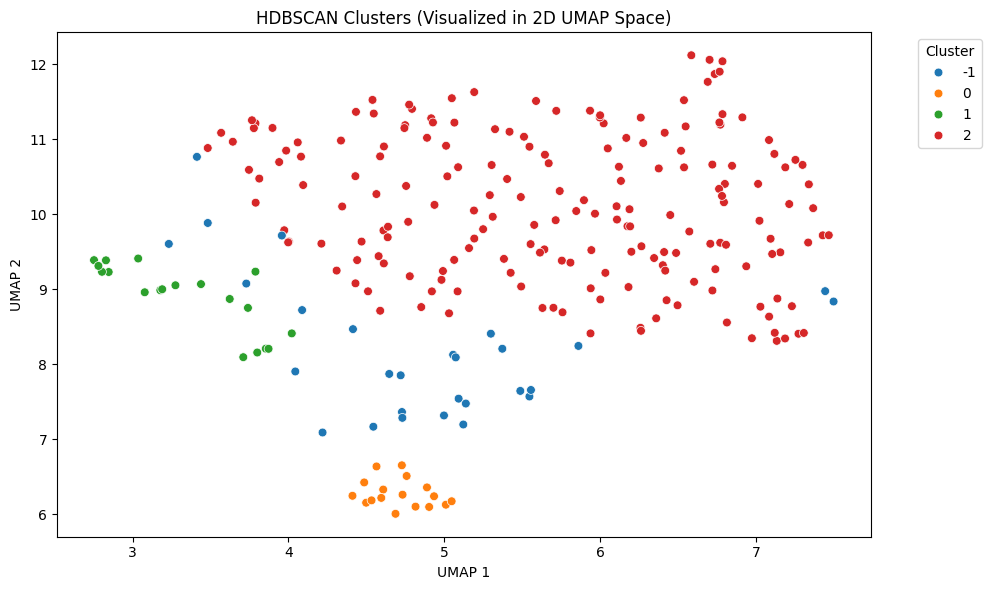

In [223]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_umap[:, 0],
    y=X_umap[:, 1],
    hue=labels,
    palette='tab10',
    s=40
)
plt.title("HDBSCAN Clusters (Visualized in 2D UMAP Space)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The clusters represented as `-1` class represents the outliers of the reduced feature dataframe as per HDBSCAN. Further, we can get the tree on how these clusters are classified intuitively through using a Decision Tree Classifier

In [230]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [241]:


# Features: drop columns that are not features, e.g., 'hadm_id', 'cluster'
X = feature_table.drop(columns=['hadm_id', 'cluster'], errors='ignore')

# Target: cluster labels
y = feature_table['cluster']

# Optionally filter out noise cluster (-1)
mask = (y != -1)
X_filtered = X[mask]
y_filtered = y[mask]

dtc = DecisionTreeClassifier()
dtc.fit(X_filtered, y_filtered)


DecisionTreeClassifier()

In [242]:
print(X_filtered.shape)  # Should be (N_samples, N_features)
print(y_filtered.shape)

(224, 111)
(224,)


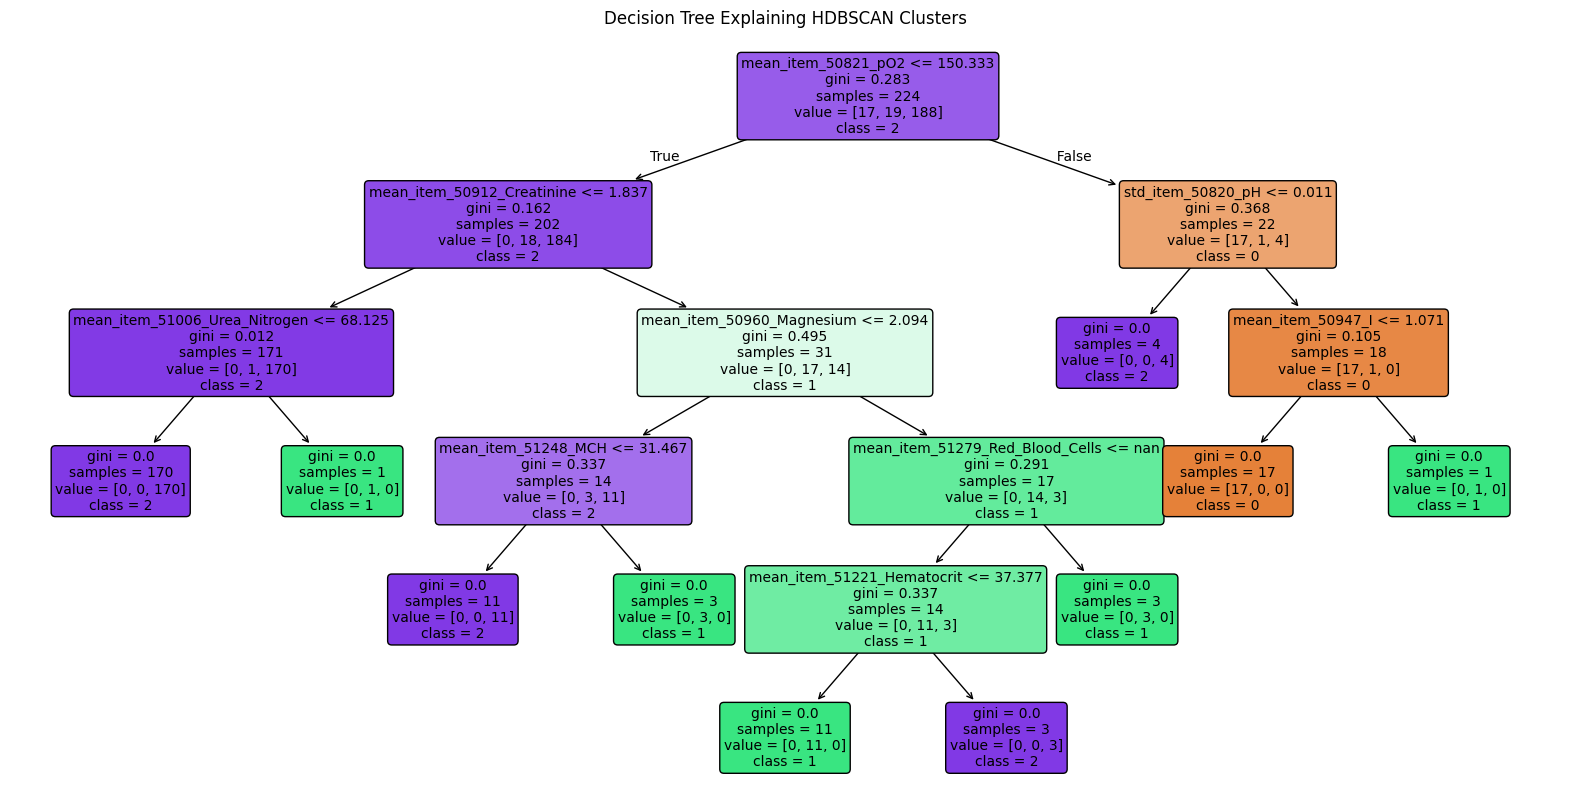

In [243]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dtc,
          feature_names=X_filtered.columns,
          class_names=[str(i) for i in clf.classes_],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Explaining HDBSCAN Clusters")
plt.show()


In [247]:
!pip install dtreeviz
!sudo apt-get install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
